# Application of data analytics tools for predicting the results of a biathlon sports competition

The purpose of this project is to test the ability to predict the final results of biathletes in a particular race

In the first part of the study we will explore the possibility of predicting the performance parameters of athletes in the next race based on the parameters of their previous performances. This task comes down to creating time series with the performance parameters of each athlete in the 2020-2021 season and analyzing these time series.

In [1]:
import pandas as pd
import numpy as np

In this project the technical protocols of the races of the World Cups and the Biathlon World Championships of the seasons '2019-2020' and '2020-2021' are used ('SIWIDATA').

In [2]:
# save the technical protocols of the races in the variables with Pandas method '.read_excel()'
Sprint1 = pd.read_excel('races_protocols/menSprint20201.xlsx')
Sprint2 = pd.read_excel('races_protocols/menSprint20202.xlsx')
Sprint3 = pd.read_excel('races_protocols/menSprint20203.xlsx')
Sprint4 = pd.read_excel('races_protocols/menSprint20204.xlsx')
Sprint5 = pd.read_excel('races_protocols/menSprint20205.xlsx') 
Sprint6 = pd.read_excel('races_protocols/menSprint20206.xlsx')
Sprint7 = pd.read_excel('races_protocols/menSprint20207.xlsx')
Sprint8 = pd.read_excel('races_protocols/menSprint20208.xlsx')
Sprint9 = pd.read_excel('races_protocols/menSprint20211.xlsx')
Sprint10 = pd.read_excel('races_protocols/menSprint20212.xlsx')
Sprint11 = pd.read_excel('races_protocols/menSprint20213.xlsx')
Sprint12 = pd.read_excel('races_protocols/menSprint20214.xlsx')
Sprint13 = pd.read_excel('races_protocols/menSprint20215.xlsx')
Sprint14 = pd.read_excel('races_protocols/menSprint20216.xlsx')
Sprint15 = pd.read_excel('races_protocols/menSprint20217.xlsx')
Sprint16 = pd.read_excel('races_protocols/menSprint20218.xlsx')

# The variable "Sprint17" contains information about the race results will be predicted of
Sprint17 = pd.read_excel('races_protocols/menSprint20219.xlsx')

In [3]:
# List 'AllSprintList' contains all the variables
AllSprintList = [Sprint1, Sprint2, Sprint3, Sprint4, Sprint5, Sprint6, Sprint7, Sprint8, 
                 Sprint9, Sprint10, Sprint11, Sprint12, Sprint13, Sprint14, Sprint15, 
                 Sprint16, Sprint17]

Let's have a look at data

In [4]:
AllSprintList[0].head()

,ibuid,familyName,givenName,nation,Date,speed,pronePercent,standingPercent,totalShootingTime,Rank
0,BTNOR11605199301,Boe,Johannes Thingnes,NOR,2019-12-01,26.845886,0.8,1.0,33.15,1
1,BTNOR12907198801,Boe,Tarjei,NOR,2019-12-01,26.676103,1.0,0.8,40.50,2
2,BTRUS13103199301,Eliseev,Matvey,RUS,2019-12-01,25.888645,1.0,1.0,30.60,3
3,BTRUS13101199201,Loginov,Alexander,RUS,2019-12-01,26.084959,1.0,0.8,25.75,4
4,BTFRA11409198801,Fourcade,Martin,FRA,2019-12-01,26.815409,1.0,0.6,35.60,5


In [5]:
AllSprintList[8].info()
AllSprintList[10].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ibuid              101 non-null    object        
 1   familyName         101 non-null    object        
 2   givenName          101 non-null    object        
 3   nation             101 non-null    object        
 4   Date               101 non-null    datetime64[ns]
 5   speed              101 non-null    float64       
 6   pronePercent       101 non-null    float64       
 7   standingPercent    101 non-null    float64       
 8   totalShootingTime  101 non-null    float64       
 9   Rank               101 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 8.0+ KB


,speed,pronePercent,standingPercent,totalShootingTime,Rank
count,107.000000,107.000000,107.000000,107.000000,107.000000
mean,25.462767,0.814860,0.786822,29.899533,53.971963
std,0.858543,0.206514,0.207722,4.025042,31.008355
min,23.083236,0.200000,0.000000,22.600000,1.000000
25%,24.827154,0.700000,0.600000,27.225000,27.500000
50%,25.444756,0.800000,0.800000,29.500000,54.000000
75%,26.098684,1.000000,1.000000,32.175000,80.500000
max,27.370453,1.000000,1.000000,42.650000,107.000000


Each biathlete has a unique identification number "ibuid", the date of the competition in the "Date" column, the average speed in the race in the "speed" column, the accuracy of shooting in the prone position in the "pronePercent" column, the accuracy of shooting in the standing position in the "standingPercent" column, the total amount of time spent on shooting in the "totalShootingTime" column, the final place in the race in the "Rank" column

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

Let's build Boxplot graphs for each of the parameters for one of the races

<AxesSubplot:xlabel='speed'>

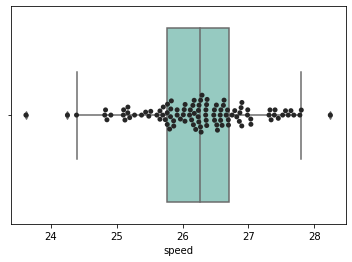

In [7]:
sns.boxplot(x=AllSprintList[15]['speed'], palette='Set3')
sns.swarmplot(x=AllSprintList[15]['speed'], color='.15')

<AxesSubplot:xlabel='totalShootingTime'>

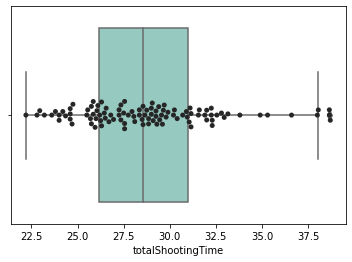

In [8]:
sns.boxplot(x=AllSprintList[15]['totalShootingTime'], palette='Set3')
sns.swarmplot(x=AllSprintList[15]['totalShootingTime'], color='.15')

<AxesSubplot:>

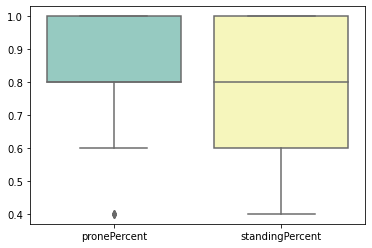

In [9]:
sns.boxplot(data=AllSprintList[15][['pronePercent',
'standingPercent']], palette='Set3')

The graphs above allow us to conclude that data contains outliers that can negatively affect the accuracy of the forecast. However taking into account the specifics of the subject we should abandon the idea of getting rid of all values that lie outside the 95 percentile. 
Talking about the speed the high value cannot be considered a random value. It is impossible to show a high speed ski course by accident. If a biathlete shows an abnormally high level of speed then this indicates his excellent skiing form. Thus by clearing this value from the input data we will not be able to increase the accuracy of the forecast. At the same time, low speed can be caused by random factors: for example, a biathlete may fall. This value will "pollute" the input data, since a fall in biathlon is a statistically insignificant phenomenon.
As for the total shooting time it also seems impractical to discard data on a too low value of the shooting time, since this value can only be due to a high degree of athlete's shooting form. On the other hand, if the shooting time value is too high this may indicate that the biathlete had difficulties with the equipment, and the result can be considered random.
The shooting accuracy values are biased towards high accuracy, so there are no values beyond 95 percentile. In addition, biathletes perform only 5 shots at each firing line, so often one extra miss makes the value of the shooting accuracy abnormal from the point of view of statistics, but it can be an important predictor of the future parameters of his performances. Therefore it was decided not to discard abnormal values of shooting accuracy.

As we could see above the performance parameters of athletes are measured in different ranges. We can solve this problem by using data scaling tools. Let's perform min max normalization, which is bringing all parameters to a single range without changing the shape of the distribution.

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
# create a dataset "InputForTS" containing the results of the sprint races of the 2020-2021 season 
# remove the outliers and normalize the data
InputForTS = pd.DataFrame()
for table in AllSprintList[8:16]:
    table = table.loc[table['speed'] > table['speed'].quantile(0.01)]
    table = table.loc[table['totalShootingTime'] < table['totalShootingTime'].quantile(0.99)]
    table[['speed', 'totalShootingTime']] = MinMaxScaler().fit_transform(table[
                                                             ['speed', 'totalShootingTime']])
    InputForTS = InputForTS.append(table)

In [12]:
# we need the results of those biathletes who participated in the target race
InputForTS = InputForTS.loc[InputForTS['ibuid'].isin(Sprint17['ibuid'])]

In [13]:
# set index to a column containing race's dates
InputForTS = InputForTS.set_index(InputForTS['Date'])
InputForTS.index = pd.to_datetime(InputForTS.index)

We should check the time series for stationarity. Stationarity means that the statistical properties of a process generating a time series do not change over time. Most time series models model and predict the statistical properties of a process in one way or another, so if the original series is not stationary the predictions may be incorrect.
One way to test a time series stationarity is to apply the augmented Dickey-Fuller test. The null hypothesis of the test is that the time series can be represented by a unit root that is not stationary, and the alternative, thus, is that the time series is stationary. If p-value < 0.05 we reject the null hypothesis.

In [14]:
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [15]:
# a Dickey-Fuller test for each time series
DFTest1 = pd.DataFrame()
adf_results = pd.DataFrame()
for ibuid in InputForTS['ibuid'].unique():
    data = InputForTS[['ibuid', 'speed', 'pronePercent', 
                       'standingPercent', 'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    for col in data[['speed', 'pronePercent', 
                     'standingPercent', 'totalShootingTime']].columns.values:
        try:
            adf_results[col] = adfuller(data[col])
        except:
            continue
        DFTest1 = DFTest1.append(pd.DataFrame({
            'ibuid': [ibuid], 
             'par': [col], 
             'p-value': adf_results.loc[1][col],
              'test': ['non-stationary' if (adf_results.loc[1][col] > 0.05) 
                      else 'stationary']
         })).dropna()

In [16]:
DFTest1['test'].value_counts()

non-stationary    203
stationary        133
Name: test, dtype: int64

The calculation showes that there are both stationary and non-stationary series in the dataset.

Let's check whether the time series first-order differences are stationary

In [17]:
a = DFTest1[DFTest1['test'] == 'non-stationary']
TSTransformed = pd.DataFrame()
for ibuid in InputForTS['ibuid'].unique():
    data = InputForTS[['ibuid', 'speed', 'pronePercent', 
                       'standingPercent', 'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    for col in data.columns.values:
        if np.isin(col, a['par'][a['ibuid'] == ibuid]) == True:
            data[col] = data[col] - data[col].shift(1)
    TSTransformed = TSTransformed.append(data).dropna()

In [18]:
DFTest2 = pd.DataFrame()

for ibuid in TSTransformed['ibuid'].unique():
    data = TSTransformed[['ibuid', 'speed', 'pronePercent', 'standingPercent', 'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    for col in data[['speed', 'pronePercent', 'standingPercent', 'totalShootingTime']].columns.values:
        try:
            adf_results[col] = adfuller(data[col])
        except:
            continue
        DFTest2 = DFTest2.append(pd.DataFrame({
            'ibuid': [ibuid], 
             'par': [col], 
             'p-value': adf_results.loc[1][col],
              'test': ['non-stationary' if (adf_results.loc[1][col] > 0.05) 
                      else 'stationary']
         })).dropna()

In [19]:
DFTest2['test'].value_counts()

stationary        173
non-stationary    138
Name: test, dtype: int64

Most of the rows are stationary. If it is possible to obtain a stationary series from a non-stationary series by taking the  first-order differences, then it is called first-order integrated raw. Thus, we can conclude that most of the time series can be correctly described by time series models.

Since the races are not held at regular intervals, the time series are unevenly-spaced. This can negatively affect the accuracy of the forecast, since time series models require equal time intervals.

In [20]:
# a function sets the time index of the series of equal intervals and interpolates the missing values using the specified method
# sprint races are held approximately once every 2 weeks during the season
def resamplefunc(data, method):
    resamle_index = pd.date_range(start=data.index[0], end=data.index[-1], freq="2W")
    return data.combine_first(pd.DataFrame(index=resamle_index, columns=data.columns)
                            ).interpolate(method=method).resample("2W").asfreq()

In [21]:
# the 'Pad' method fills in the missing values with the previous values
ResampledPad = pd.DataFrame()
for ibuid in InputForTS['ibuid'].unique():
    data = InputForTS[['ibuid', 'speed', 
    'pronePercent', 'standingPercent', 
                    'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    data = resamplefunc(data, 'pad')
    ResampledPad = ResampledPad.append(
                            data.dropna())

In [22]:
DFTest3 = pd.DataFrame()

for ibuid in ResampledPad['ibuid'].unique():
    data = ResampledPad[['ibuid', 'speed', 'pronePercent', 'standingPercent', 'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    for col in data[['speed', 'pronePercent', 'standingPercent', 'totalShootingTime']].columns.values:
        try:
            adf_results[col] = adfuller(data[col])
        except:
            continue
        DFTest3 = DFTest3.append(pd.DataFrame({
            'ibuid': [ibuid], 
             'par': [col], 
             'p-value': adf_results.loc[1][col],
              'test': ['non-stationary' if (adf_results.loc[1][col] > 0.05) 
                      else 'stationary']
         })).dropna()

In [23]:
c = DFTest3[DFTest3['test'] == 'non-stationary']

In [24]:
# the 'Linear' method fills in the missing values with the intermediate values of the function 
# by drawing a straight line between them
ResampledLinear = pd.DataFrame()
for ibuid in InputForTS['ibuid'].unique():
    data = InputForTS[['ibuid', 'speed', 
    'pronePercent', 'standingPercent', 
                    'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    data = resamplefunc(data, 'linear')
    data['ibuid'].fillna(ibuid, inplace = True)
    ResampledLinear = ResampledLinear.append(
                                data.dropna())

In [25]:
DFTest4 = pd.DataFrame()

for ibuid in ResampledLinear['ibuid'].unique():
    data = ResampledLinear[['ibuid', 'speed', 'pronePercent', 'standingPercent', 'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    for col in data[['speed', 'pronePercent', 'standingPercent', 'totalShootingTime']].columns.values:
        try:
            adf_results[col] = adfuller(data[col])
        except:
            continue
        DFTest4 = DFTest4.append(pd.DataFrame({
            'ibuid': [ibuid], 
             'par': [col], 
             'p-value': adf_results.loc[1][col],
              'test': ['non-stationary' if (adf_results.loc[1][col] > 0.05) 
                      else 'stationary']
         })).dropna()

In [26]:
e = DFTest4[DFTest4['test'] == 'non-stationary']

In [27]:
# the 'Nearest' method fills in the missing values with the nearest values
ResampledNearest = pd.DataFrame()
for ibuid in InputForTS['ibuid'].unique():
    data = InputForTS[['ibuid', 'speed', 
    'pronePercent', 'standingPercent', 
                    'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    data = resamplefunc(data, 'nearest')
    data['ibuid'].fillna(ibuid, inplace = True)
    ResampledNearest = ResampledNearest.append(
                                data.dropna())

In [28]:
DFTest5 = pd.DataFrame()
for ibuid in ResampledNearest['ibuid'].unique():
    data = ResampledNearest[['ibuid', 'speed', 'pronePercent', 'standingPercent', 'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    for col in data[['speed', 'pronePercent', 'standingPercent', 'totalShootingTime']].columns.values:
        try:
            adf_results[col] = adfuller(data[col])
        except:
            continue
        DFTest5 = DFTest5.append(pd.DataFrame({
            'ibuid': [ibuid], 
             'par': [col], 
             'p-value': adf_results.loc[1][col],
              'test': ['non-stationary' if (adf_results.loc[1][col] > 0.05) 
                      else 'stationary']
         })).dropna()

In [29]:
f = DFTest5[DFTest5['test'] == 'non-stationary']

# Time series analysis

In this part we will predict parameters of biathletes performance in the men's sprint, which took place on 13.03.2021.

The first model is the autoregression (AR) model.
To stabilize the variance we will use the Box-Cox transform on non-stationary time series.

In [30]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import ar_select_order
from scipy.stats import boxcox
from scipy.special import inv_boxcox1p

In [31]:
# "ARmodel" function returns the forecast made by the "AutoReg" model
# taking as input the time series and the order of the model
def ARmodel(data, order):
    model = AutoReg(data, order)
    model._index = pd.to_datetime(data.index)
    model_fit = model.fit()
    ypred = model_fit.predict(len(data), len(data))
    return ypred

In [32]:
# obtain a set of predicted data for the dataset "ResampledPad" with automatic selection of the model order (where possible) 
# with the Box-Cox transformation of non-stationary time series
# for those time series where the automatic selection of the parameter gives an invalid result
# we assume p = 1, since  the partial autocorrelation function has an outlier at the lag of 1 for 
# most time series and there is no correlation for other delays.
ARTransfBCResPad = pd.DataFrame()
for ibuid in ResampledPad['ibuid'].unique():
    data = ResampledPad[['ibuid', 'speed', 
    'pronePercent', 'standingPercent', 'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    try:
        for col in data[['speed', 'pronePercent', 
    'standingPercent', 'totalShootingTime']].columns.values:
            if np.isin(col, c['par'][c['ibuid'] == ibuid]) == True:
                d = boxcox(data[col]+1, lmbda=None)
                data[col] = d[0]
                try:
                    order = ar_select_order(data[col], 3)
                    y = inv_boxcox1p(ARmodel(data[col], 
                                order=order.ar_lags[-1:])[0], d[1])
                except:
                    y = inv_boxcox1p(ARmodel(data[col], 1)[0], d[1])
            else:
                try:
                    order = ar_select_order(data[col], 3)
                    y = ARmodel(data[col], order=order.ar_lags[-1:])[0]
                except:
                    y = ARmodel(data[col], 1)[0]   
            if col == 'speed':
                sp = pd.DataFrame([y], columns = ['speed'])
            elif col == 'pronePercent':
                prP = pd.DataFrame([y], columns = ['pronePercent'])
            elif col == 'standingPercent':
                stP = pd.DataFrame([y], columns = ['standingPercent'])
            else:
                tsT = pd.DataFrame([y], columns = ['totalShootingTime'])
            n = pd.DataFrame(data['ibuid'].unique(), columns = ['ibuid'])
        ARTransfBCResPad = ARTransfBCResPad.append(pd.concat([
                                n, sp, prP, stP, tsT], axis=1)).dropna()
    except:
        continue

In [33]:
# obtain a set of predicted data for the dataset "ResampledLinear" with automatic selection of the model order (where possible) 
# with the Box-Cox transformation of non-stationary time series
ARTransfBCResLin = pd.DataFrame()
for ibuid in ResampledLinear['ibuid'].unique():
    data = ResampledLinear[['ibuid', 'speed', 'pronePercent', 'standingPercent', 'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    try:
        for col in data[['speed', 'pronePercent', 'standingPercent', 'totalShootingTime']].columns.values:
            if np.isin(col, e['par'][e['ibuid'] == ibuid]) == True:
                d = boxcox(data[col]+1, lmbda=None)
                data[col] = d[0]
                try:
                    order = ar_select_order(data[col], 3)
                    y = inv_boxcox1p(ARmodel(data[col], order=order.ar_lags[-1:])[0], d[1])
                except:
                    y = inv_boxcox1p(ARmodel(data[col], 1)[0], d[1])
            else:
                try:
                    order = ar_select_order(data[col], 3)
                    y = ARmodel(data[col], order=order.ar_lags[-1:])[0]
                except:
                    y = ARmodel(data[col], 1)[0]   
            if col == 'speed':
                sp = pd.DataFrame([y], columns = ['speed'])
            elif col == 'pronePercent':
                prP = pd.DataFrame([y], columns = ['pronePercent'])
            elif col == 'standingPercent':
                stP = pd.DataFrame([y], columns = ['standingPercent'])
            else:
                tsT = pd.DataFrame([y], columns = ['totalShootingTime'])
            n = pd.DataFrame(data['ibuid'].unique(), columns = ['ibuid'])
        ARTransfBCResLin = ARTransfBCResLin.append(pd.concat([n, sp, prP, stP, tsT], axis=1)).dropna()
    except:
        continue

In [34]:
# obtain a set of predicted data for the dataset "ResampledNearest" with automatic selection of the model order (where possible) 
# with the Box-Cox transformation of non-stationary time series
ARTransfBCResNear = pd.DataFrame()
for ibuid in ResampledNearest['ibuid'].unique():
    data = ResampledNearest[['ibuid', 'speed', 'pronePercent', 'standingPercent', 'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    try:
        for col in data[['speed', 'pronePercent', 'standingPercent', 'totalShootingTime']].columns.values:
            if np.isin(col, f['par'][f['ibuid'] == ibuid]) == True:
                d = boxcox(data[col]+1, lmbda=None)
                data[col] = d[0]
                try:
                    order = ar_select_order(data[col], 3)
                    y = inv_boxcox1p(ARmodel(data[col], order=order.ar_lags[-1:])[0], d[1])
                except:
                    y = inv_boxcox1p(ARmodel(data[col], 1)[0], d[1])
            else:
                try:
                    order = ar_select_order(data[col], 3)
                    y = ARmodel(data[col], order=order.ar_lags[-1:])[0]
                except:
                    y = ARmodel(data[col], 1)[0]   
            if col == 'speed':
                sp = pd.DataFrame([y], columns = ['speed'])
            elif col == 'pronePercent':
                prP = pd.DataFrame([y], columns = ['pronePercent'])
            elif col == 'standingPercent':
                stP = pd.DataFrame([y], columns = ['standingPercent'])
            else:
                tsT = pd.DataFrame([y], columns = ['totalShootingTime'])
            n = pd.DataFrame(data['ibuid'].unique(), columns = ['ibuid'])
        ARTransfBCResNear = ARTransfBCResNear.append(pd.concat([n, sp, prP, stP, tsT], axis=1)).dropna()
    except:
        continue

The second model is the autoregression — moving average ("ARMA") model.

In [35]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import arma_order_select_ic

In [36]:
# "ARMAmodel" function returns the forecast made by the "ARMA" model
# taking as input the time series and the order of the model
def ARMAmodel(data, order):
    model = ARMA(data, order)
    model._index = pd.to_datetime(data.index)
    model_fit = model.fit()
    ypred = model_fit.predict(len(data), len(data))
    return ypred

In [37]:
# obtain a set of predicted data for the dataset "ResampledPad" with automatic selection of the model order (where possible) 
# with the Box-Cox transformation of non-stationary time series
ARMATransfBCResPad = pd.DataFrame()
for ibuid in ResampledPad['ibuid'].unique():
    data = ResampledPad[['ibuid', 'speed', 'pronePercent', 'standingPercent', 'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    try:
        for col in data[['speed', 'pronePercent', 'standingPercent', 'totalShootingTime']].columns.values:
            if np.isin(col, c['par'][c['ibuid'] == ibuid]) == True:
                d = boxcox(data[col]+1, lmbda=None)
                data[col] = d[0]
                try:
                    order = arma_order_select_ic(data[col], ic=['aic'], fit_kw=dict(method='css'))
                    y = inv_boxcox1p(ARMAmodel(data[col], order=order.aic_min_order), d[1])
                except:
                    y = inv_boxcox1p(ARMAmodel(data[col], order=(1, 0)), d[1])
            else:
                try:
                    order = arma_order_select_ic(data[col], ic=['aic'], fit_kw=dict(method='css'))
                    y = ARMAmodel(data[col], order=order.aic_min_order)
                except:
                    y = ARMAmodel(data[col], order=(1, 0))  
            if col == 'speed':
                sp = pd.DataFrame(y, columns = ['speed'])
                sp.reset_index(inplace = True, drop = True) 
            elif col == 'pronePercent':
                prP = pd.DataFrame(y, columns = ['pronePercent'])
                prP.reset_index(inplace = True, drop = True)
            elif col == 'standingPercent':
                stP = pd.DataFrame(y, columns = ['standingPercent'])
                stP.reset_index(inplace = True, drop = True)
            else:
                tsT = pd.DataFrame(y, columns = ['totalShootingTime'])
                tsT.reset_index(inplace = True, drop = True)
            n = pd.DataFrame(data['ibuid'].unique(), columns = ['ibuid'])
            n.reset_index(inplace = True, drop = True)
        ARMATransfBCResPad = ARMATransfBCResPad.append(pd.concat([n, sp, prP, stP, tsT], axis=1))
    except:
        continue
ARMATransfBCResPad = ARMATransfBCResPad.dropna()

In [38]:
# obtain a set of predicted data for the dataset "ResampledLinear" with automatic selection of the model order (where possible) 
# with the Box-Cox transformation of non-stationary time series
ARMATransfBCResLin = pd.DataFrame()
for ibuid in ResampledLinear['ibuid'].unique():
    data = ResampledLinear[['ibuid', 'speed', 
    'pronePercent', 'standingPercent', 'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    try:
        for col in data[['speed', 'pronePercent', 
    'standingPercent', 'totalShootingTime']].columns.values:
            if np.isin(col, e['par'][e['ibuid'] == ibuid]) == True:
                d = boxcox(data[col]+1, lmbda=None)
                data[col] = d[0]
                try:
                    order = arma_order_select_ic(data[col], 
                    ic=['aic'], fit_kw=dict(method='css'))
                    y = inv_boxcox1p(ARMAmodel(data[col], 
                        order=order.aic_min_order), d[1])
                except:
                    y = inv_boxcox1p(ARMAmodel(data[col], 
                                    order=(1, 0)), d[1])
            else:
                try:
                    order = arma_order_select_ic(data[col], ic=['aic'], 
                                            fit_kw=dict(method='css'))
                    y = ARMAmodel(data[col], order=order.aic_min_order)
                except:
                    y = ARMAmodel(data[col], order=(1,0))  
            if col == 'speed':
                sp = pd.DataFrame(y, columns = ['speed'])
                sp.reset_index(inplace = True, drop = True) 
            elif col == 'pronePercent':
                prP = pd.DataFrame(y, columns = ['pronePercent'])
                prP.reset_index(inplace = True, drop = True)
            elif col == 'standingPercent':
                stP = pd.DataFrame(y, columns = ['standingPercent'])
                stP.reset_index(inplace = True, drop = True)
            else:
                tsT = pd.DataFrame(y, columns = ['totalShootingTime'])
                tsT.reset_index(inplace = True, drop = True)
            n = pd.DataFrame(data['ibuid'].unique(), columns = ['ibuid'])
            n.reset_index(inplace = True, drop = True)
        ARMATransfBCResLin = ARMATransfBCResLin.append(pd.concat([
                                    n, sp, prP, stP, tsT], axis=1))
    except:
        continue
ARMATransfBCResLin = ARMATransfBCResLin.dropna()

In [39]:
# obtain a set of predicted data for the dataset "ResampledNearest" with automatic selection of the model order (where possible) 
# with the Box-Cox transformation of non-stationary time series
ARMATransfBCResNear = pd.DataFrame()
for ibuid in ResampledNearest['ibuid'].unique():
    data = ResampledNearest[['ibuid', 'speed', 'pronePercent', 'standingPercent', 'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    try:
        for col in data[['speed', 'pronePercent', 'standingPercent', 'totalShootingTime']].columns.values:
            if np.isin(col, f['par'][f['ibuid'] == ibuid]) == True:
                d = boxcox(data[col]+1, lmbda=None)
                data[col] = d[0]
                try:
                    order = arma_order_select_ic(data[col], ic=['aic'], fit_kw=dict(method='css'))
                    y = inv_boxcox1p(ARMAmodel(data[col], order=order.aic_min_order), d[1])
                except:
                    y = inv_boxcox1p(ARMAmodel(data[col], order=(1, 0)), d[1])
            else:
                try:
                    order = arma_order_select_ic(data[col], ic=['aic'], fit_kw=dict(method='css'))
                    y = ARMAmodel(data[col], order=order.aic_min_order)
                except:
                    y = ARMAmodel(data[col], order=(1, 0))  
            if col == 'speed':
                sp = pd.DataFrame(y, columns = ['speed'])
                sp.reset_index(inplace = True, drop = True) 
            elif col == 'pronePercent':
                prP = pd.DataFrame(y, columns = ['pronePercent'])
                prP.reset_index(inplace = True, drop = True)
            elif col == 'standingPercent':
                stP = pd.DataFrame(y, columns = ['standingPercent'])
                stP.reset_index(inplace = True, drop = True)
            else:
                tsT = pd.DataFrame(y, columns = ['totalShootingTime'])
                tsT.reset_index(inplace = True, drop = True)
            n = pd.DataFrame(data['ibuid'].unique(), columns = ['ibuid'])
            n.reset_index(inplace = True, drop = True)
        ARMATransfBCResNear = ARMATransfBCResNear.append(pd.concat([n, sp, prP, stP, tsT], axis=1))
    except:
        continue

The third model is autoregressive integrated moving average ("ARIMA"). The "ARIMA" models are applied in cases where the time series is non-stationary but differences of any order are stationary. As shown above, a lot of the series in our dataset are first-order integrated series.

In [40]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [41]:
# "AuArmodel" function returns the forecast made by the model" auto_arima"
def AuArmodel(data):
    model = auto_arima(data, error_action='ignore', suppress_warnings=True)
    model_fit = model.fit(data)
    ypred = model_fit.predict(n_periods=1)
    return ypred

# "ARIMAmodel" function returns the forecast made by the model" ARIMA" taking a time series and the order of the model as input 
# the differentiation parameter is 1, because a lot of the series in our dataset are first-order integrated series
def ARIMAmodel(data, order=(1,1,1)):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    ypred = model_fit.forecast()
    return ypred

In [42]:
# obtain a set of predicted data for the dataset "ResampledPad" with automatic selection of the model order (where possible) 
# with the Box-Cox transformation of non-stationary time series
ARIMATransfBCResPad = pd.DataFrame()
for ibuid in ResampledPad['ibuid'].unique():
    data = ResampledPad[['ibuid', 'speed', 'pronePercent', 'standingPercent', 'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    try:
        for col in data[['speed', 'pronePercent', 'standingPercent', 'totalShootingTime']].columns.values:
            if np.isin(col, c['par'][c['ibuid'] == ibuid]) == True:
                d = boxcox(data[col]+1, lmbda=None)
                data[col] = d[0]
                try:
                    y = inv_boxcox1p(AuArmodel(data[col]), d[1])
                except:
                    y = inv_boxcox1p(ARIMAmodel(data[col]), d[1])
            else:
                try:
                    y = AuArmodel(data[col])
                except:
                    y = ARIMAmodel(data[col])
            if col == 'speed':
                sp = pd.DataFrame(y, columns = ['speed'])
                sp.reset_index(inplace = True, drop = True) 
            elif col == 'pronePercent':
                prP = pd.DataFrame(y, columns = ['pronePercent'])
                prP.reset_index(inplace = True, drop = True)
            elif col == 'standingPercent':
                stP = pd.DataFrame(y, columns = ['standingPercent'])
                stP.reset_index(inplace = True, drop = True)
            else:
                tsT = pd.DataFrame(y, columns = ['totalShootingTime'])
                tsT.reset_index(inplace = True, drop = True)
            n = pd.DataFrame(data['ibuid'].unique(), columns = ['ibuid'])
            n.reset_index(inplace = True, drop = True)
        ARIMATransfBCResPad = ARIMATransfBCResPad.append(pd.concat([n, sp, prP, stP, tsT], axis=1))
    except:
        continue

In [43]:
# obtain a set of predicted data for the dataset "ResampledLinear" with automatic selection of the model order (where possible) 
# with the Box-Cox transformation of non-stationary time series
ARIMATransfBCResLin = pd.DataFrame()
for ibuid in ResampledLinear['ibuid'].unique():
    data = ResampledLinear[['ibuid', 'speed', 'pronePercent', 'standingPercent', 'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    try:
        for col in data[['speed', 'pronePercent', 'standingPercent', 'totalShootingTime']].columns.values:
            if np.isin(col, e['par'][e['ibuid'] == ibuid]) == True:
                d = boxcox(data[col]+1, lmbda=None)
                data[col] = d[0]
                try:
                    y = inv_boxcox1p(AuArmodel(data[col]), d[1])
                except:
                    y = inv_boxcox1p(ARIMAmodel(data[col]), d[1])
            else:
                try:
                    y = AuArmodel(data[col])
                except:
                    y = ARIMAmodel(data[col])
            if col == 'speed':
                sp = pd.DataFrame(y, columns = ['speed'])
                sp.reset_index(inplace = True, drop = True) 
            elif col == 'pronePercent':
                prP = pd.DataFrame(y, columns = ['pronePercent'])
                prP.reset_index(inplace = True, drop = True)
            elif col == 'standingPercent':
                stP = pd.DataFrame(y, columns = ['standingPercent'])
                stP.reset_index(inplace = True, drop = True)
            else:
                tsT = pd.DataFrame(y, columns = ['totalShootingTime'])
                tsT.reset_index(inplace = True, drop = True)
            n = pd.DataFrame(data['ibuid'].unique(), columns = ['ibuid'])
            n.reset_index(inplace = True, drop = True)
        ARIMATransfBCResLin = ARIMATransfBCResLin.append(pd.concat([n, sp, prP, stP, tsT], axis=1))
    except:
        continue

In [44]:
# obtain a set of predicted data for the dataset "ResampledNearest" with automatic selection of the model order (where possible) 
# with the Box-Cox transformation of non-stationary time series
ARIMATransfBCResNear = pd.DataFrame()
for ibuid in ResampledNearest['ibuid'].unique():
    data = ResampledNearest[['ibuid', 'speed', 
        'pronePercent', 'standingPercent', 'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    try:
        for col in data[['speed', 'pronePercent', 
        'standingPercent', 'totalShootingTime']].columns.values:
            if np.isin(col, f['par'][f['ibuid'] == ibuid]) == True:
                d = boxcox(data[col]+1, lmbda=None)
                data[col] = d[0]
                try:
                    y = inv_boxcox1p(AuArmodel(data[col]), d[1])
                except:
                    y = inv_boxcox1p(ARIMAmodel(data[col]), d[1])
            else:
                try:
                    y = AuArmodel(data[col])
                except:
                    y = ARIMAmodel(data[col])
            if col == 'speed':
                sp = pd.DataFrame(y, columns = ['speed'])
                sp.reset_index(inplace = True, drop = True) 
            elif col == 'pronePercent':
                prP = pd.DataFrame(y, columns = ['pronePercent'])
                prP.reset_index(inplace = True, drop = True)
            elif col == 'standingPercent':
                stP = pd.DataFrame(y, columns = ['standingPercent'])
                stP.reset_index(inplace = True, drop = True)
            else:
                tsT = pd.DataFrame(y, columns = ['totalShootingTime'])
                tsT.reset_index(inplace = True, drop = True)
            n = pd.DataFrame(data['ibuid'].unique(), columns = ['ibuid'])
            n.reset_index(inplace = True, drop = True)
        ARIMATransfBCResNear = ARIMATransfBCResNear.append(pd.concat([n, sp, prP, stP, tsT], axis=1))
    except:
        continue

The fourth model is double exponential smoothing. Double exponential smoothing has a smoothing constant and a trend constant.

In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [46]:
# a smoothing constant is 0.3, which was selected experimentally
def ExpSmmodel(data, smoothing_level = 0.3, trend='add'):
    model = ExponentialSmoothing(data)
    model._index = pd.to_datetime(data.index)
    model_fit = model.fit(smoothing_level = smoothing_level)
    ypred = model_fit.predict(len(data), len(data))
    return ypred

In [47]:
# obtain a set of predicted data for the dataset "ResampledPad" with automatic selection of the model order (where possible) 
# with the Box-Cox transformation of non-stationary time series
ExpSmTransfBCResPad = pd.DataFrame()
for ibuid in ResampledPad['ibuid'].unique():
    data = ResampledPad[['ibuid', 'speed', 'pronePercent', 'standingPercent', 'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    try:
        for col in data[['speed', 'pronePercent', 'standingPercent', 'totalShootingTime']].columns.values:
            if np.isin(col, c['par'][c['ibuid'] == ibuid]) == True:
                d = boxcox(data[col]+1, lmbda=None)
                data[col] = d[0]
                y = inv_boxcox1p(ExpSmmodel(data[col]), d[1])
            else:
                y = ExpSmmodel(data[col])  
            if col == 'speed':
                sp = pd.DataFrame(y, columns = ['speed'])
                sp.reset_index(inplace = True, drop = True)   
            elif col == 'pronePercent':
                prP = pd.DataFrame(y, columns = ['pronePercent'])
                prP.reset_index(inplace = True, drop = True)   
            elif col == 'standingPercent':
                stP = pd.DataFrame(y, columns = ['standingPercent'])
                stP.reset_index(inplace = True, drop = True)   
            else:
                tsT = pd.DataFrame(y, columns = ['totalShootingTime'])
                tsT.reset_index(inplace = True, drop = True)   
            n = pd.DataFrame(data['ibuid'].unique(), columns = ['ibuid'])
            n.reset_index(inplace = True, drop = True)
        ExpSmTransfBCResPad = ExpSmTransfBCResPad.append(pd.concat([n, sp, prP, stP, tsT], axis=1))
    except:
        continue
    with pd.option_context('mode.use_inf_as_na', True):
        ExpSmTransfBCResPad = ExpSmTransfBCResPad.dropna()

In [48]:
# obtain a set of predicted data for the dataset "ResampledLinear" with automatic selection of the model order (where possible) 
# with the Box-Cox transformation of non-stationary time series
ExpSmTransfBCResLin = pd.DataFrame()
for ibuid in ResampledLinear['ibuid'].unique():
    data = ResampledLinear[['ibuid', 'speed', 'pronePercent', 'standingPercent', 'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    try:
        for col in data[['speed', 'pronePercent', 'standingPercent', 'totalShootingTime']].columns.values:
            if np.isin(col, e['par'][e['ibuid'] == ibuid]) == True:
                d = boxcox(data[col]+1, lmbda=None)
                data[col] = d[0]
                y = inv_boxcox1p(ExpSmmodel(data[col]), d[1])
            else:
                y = ExpSmmodel(data[col])  
            if col == 'speed':
                sp = pd.DataFrame(y, columns = ['speed'])
                sp.reset_index(inplace = True, drop = True)
            elif col == 'pronePercent':
                prP = pd.DataFrame(y, columns = ['pronePercent'])
                prP.reset_index(inplace = True, drop = True)   
            elif col == 'standingPercent':
                stP = pd.DataFrame(y, columns = ['standingPercent'])
                stP.reset_index(inplace = True, drop = True)   
            else:
                tsT = pd.DataFrame(y, columns = ['totalShootingTime'])
                tsT.reset_index(inplace = True, drop = True)   
            n = pd.DataFrame(data['ibuid'].unique(), columns = ['ibuid'])
            n.reset_index(inplace = True, drop = True)
        ExpSmTransfBCResLin = ExpSmTransfBCResLin.append(pd.concat([n, sp, prP, stP, tsT], axis=1)).dropna()
    except:
        continue

In [49]:
# obtain a set of predicted data for the dataset "ResampledNearest" with automatic selection of the model order (where possible) 
# with the Box-Cox transformation of non-stationary time series
ExpSmTransfBCResNear = pd.DataFrame()
for ibuid in ResampledNearest['ibuid'].unique():
    data = ResampledNearest[['ibuid', 'speed', 
    'pronePercent', 'standingPercent', 'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    try:
        for col in data[['speed', 'pronePercent', 
        'standingPercent', 'totalShootingTime']].columns.values:
            if np.isin(col, f['par'][f['ibuid'] == ibuid]) == True:
                d = boxcox(data[col]+1, lmbda=None)
                data[col] = d[0]
                y = inv_boxcox1p(ExpSmmodel(data[col]), d[1])
            else:
                y = ExpSmmodel(data[col])  
            if col == 'speed':
                sp = pd.DataFrame(y, columns = ['speed'])
                sp.reset_index(inplace = True, drop = True)   
            elif col == 'pronePercent':
                prP = pd.DataFrame(y, columns = ['pronePercent'])
                prP.reset_index(inplace = True, drop = True)   
            elif col == 'standingPercent':
                stP = pd.DataFrame(y, columns = ['standingPercent'])
                stP.reset_index(inplace = True, drop = True)   
            else:
                tsT = pd.DataFrame(y, columns = ['totalShootingTime'])
                tsT.reset_index(inplace = True, drop = True)   
            n = pd.DataFrame(data['ibuid'].unique(), columns = ['ibuid'])
            n.reset_index(inplace = True, drop = True)
        ExpSmTransfBCResNear = ExpSmTransfBCResNear.append(pd.concat([n, sp, prP, stP, tsT], axis=1))
    except:
        continue
    with pd.option_context('mode.use_inf_as_na', True):
        ExpSmTransfBCResNear = ExpSmTransfBCResNear.dropna()

The fifth method is is the method proposed by the "traces" library. This library is designed for unevenly-spaced time series analysis, so the original dataset is used as the input to the model.

In [50]:
import traces

In [51]:
def tracesanalyses(data, date="2021-03-13"):
    ts = traces.TimeSeries(data = data)
    ypred = ts[pd.to_datetime(date)]
    return ypred

In [52]:
# obtain a set of predicted data for the dataset "InputForTS" with automatic selection of the model order (where possible) 
# with the Box-Cox transformation of non-stationary time series
TracesTransfBC = pd.DataFrame()
for ibuid in InputForTS['ibuid'].unique():
    data = InputForTS[['ibuid', 'speed', 'pronePercent', 
            'standingPercent', 'totalShootingTime']]
    data = data.loc[data['ibuid'] == ibuid]
    try:
        for col in data[['speed', 'pronePercent', 
        'standingPercent', 'totalShootingTime']].columns.values:
            if np.isin(col, a['par'][a['ibuid'] == ibuid]) == True:
                d = boxcox(data[col]+1, lmbda=None)
                data[col] = d[0]
                y = inv_boxcox1p(tracesanalyses(data[col]), d[1])
            else:
                y = tracesanalyses(data[col])  
            if col == 'speed':
                sp = pd.DataFrame([y], columns = ['speed'])
            elif col == 'pronePercent':
                prP = pd.DataFrame([y], columns = ['pronePercent'])
            elif col == 'standingPercent':
                stP = pd.DataFrame([y], columns = ['standingPercent'])
            else:
                tsT = pd.DataFrame([y], columns = ['totalShootingTime'])
            n = pd.DataFrame(data['ibuid'].unique(), columns = ['ibuid'])
        TracesTransfBC = TracesTransfBC.append(pd.concat([n, sp, prP, stP, tsT], axis=1))
    except:
        continue

In [53]:
# combine forecasts in the "tables" list
tables = [ARTransfBCResPad, ARTransfBCResLin, ARTransfBCResNear,
          ARMATransfBCResPad, ARMATransfBCResLin, ARMATransfBCResNear,
          ARIMATransfBCResPad, ARIMATransfBCResLin, ARIMATransfBCResNear,
          ExpSmTransfBCResPad, ExpSmTransfBCResLin, ExpSmTransfBCResNear, 
          TracesTransfBC]

In [54]:
# the "mergeTarget" function normalizes the target race parameters for an adequate assessment of the model results 
# and merge forecasts with the target race
def mergeTarget(data):
    Sprint17[['speed', 'totalShootingTime']] = MinMaxScaler().fit_transform(
                                               Sprint17[['speed', 'totalShootingTime']])
    data = pd.merge(Sprint17, data, how='inner', on='ibuid', sort=False)
    return data

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [56]:
# the "RMSE" function estimates the mean square error
def RMSE(data):
    return pd.DataFrame(
        {'speed': [mean_squared_error(data['speed_x'], data['speed_y'], squared=False)],
         'pronePercent': [mean_squared_error(data['pronePercent_x'], data['pronePercent_y'], squared=False)],
         'standingPercent': [mean_squared_error(data['standingPercent_x'], data['standingPercent_y'], squared=False)],
         'totalShootingTime': [mean_squared_error(data['totalShootingTime_x'], data['totalShootingTime_y'], squared=False)]
        }
                        )
# the "MAE" function estimates the mean absolute error 
def MAE(data):
    return pd.DataFrame(
        {'speed': [mean_absolute_error(data['speed_x'], data['speed_y'])],
         'pronePercent': [mean_absolute_error(data['pronePercent_x'], data['pronePercent_y'])],
         'standingPercent': [mean_absolute_error(data['standingPercent_x'], data['standingPercent_y'])],
         'totalShootingTime': [mean_absolute_error(data['totalShootingTime_x'], data['totalShootingTime_y'])]
        }
                        )

In [57]:
# the "AllRMSE" table contains the mean square error for each parameter of each table
AllRMSE = pd.DataFrame()
for table in tables:
    table= mergeTarget(table)
    AllRMSE = AllRMSE.append(RMSE(table))
AllRMSE.index = ['ARTransfBCResPad', 'ARTransfBCResLin', 'ARTransfBCResNear',
                 'ARMATransfBCResPad', 'ARMATransfBCResLin', 'ARMATransfBCResNear',
                 'ARIMATransfBCResPad', 'ARIMATransfBCResLin', 'ARIMATransfBCResNear', 
                 'ExpSmTransfBCResPad', 'ExpSmTransfBCResLin', 'ExpSmTransfBCResNear',
                 'TracesTransfBC']    
AllRMSE

,speed,pronePercent,standingPercent,totalShootingTime
ARTransfBCResPad,0.140562,0.207744,0.265606,0.190544
ARTransfBCResLin,0.128436,0.181006,0.190814,0.159439
ARTransfBCResNear,0.133237,0.190476,0.240299,0.173890
ARMATransfBCResPad,0.162454,0.220586,0.217911,0.189951
ARMATransfBCResLin,0.139897,0.200764,0.182600,0.154194
ARMATransfBCResNear,0.144590,0.209923,0.213552,0.154362
ARIMATransfBCResPad,0.190669,0.342699,0.301528,0.203967
ARIMATransfBCResLin,0.170660,0.234977,0.208026,0.170184
ARIMATransfBCResNear,0.162067,0.282942,0.246845,0.171920
ExpSmTransfBCResPad,0.153891,0.199450,0.178204,0.164581


In [58]:
# the "AllMAE" table contains the mean absolute error for each parameter of each table
AllMAE = pd.DataFrame()
for table in tables:
    table = mergeTarget(table)
    AllMAE = AllMAE.append(MAE(table))
    
AllMAE.index = ['ARTransfBCResPad', 'ARTransfBCResLin', 'ARTransfBCResNear',
                 'ARMATransfBCResPad', 'ARMATransfBCResLin', 'ARMATransfBCResNear',
                 'ARIMATransfBCResPad', 'ARIMATransfBCResLin', 'ARIMATransfBCResNear', 
                 'ExpSmTransfBCResPad', 'ExpSmTransfBCResLin', 'ExpSmTransfBCResNear',
                 'TracesTransfBC']
AllMAE

,speed,pronePercent,standingPercent,totalShootingTime
ARTransfBCResPad,0.108554,0.156303,0.185005,0.143550
ARTransfBCResLin,0.105545,0.136762,0.153324,0.116693
ARTransfBCResNear,0.105305,0.146359,0.179160,0.137059
ARMATransfBCResPad,0.123225,0.164602,0.165204,0.144127
ARMATransfBCResLin,0.115550,0.159377,0.150882,0.116461
ARMATransfBCResNear,0.114733,0.165612,0.167137,0.118654
ARIMATransfBCResPad,0.135533,0.225255,0.212213,0.144399
ARIMATransfBCResLin,0.127420,0.168412,0.157104,0.121203
ARIMATransfBCResNear,0.120810,0.195515,0.176393,0.123645
ExpSmTransfBCResPad,0.110530,0.148066,0.138062,0.122064


The speed was most accurately predicted by autoregression and exponential smoothing models, the shooting accuracy in prone position - by autoregression models, the shooting accuracy in standing position and the shooting speed – by exponential smoothing models.

# Сlassification problem

In the second part of the study we examined the possibility of predicting the distribution of the ranks of biathletes based on the parameters of their performance in the race. We will create a dataset containing data on the performances of athletes for the seasons 2019-2020, 2020-2021, train various models, and make forecast for the datasets that were obtained in the previous part of the study.

A dataset "InputForPred" contains the results of sprint races for the seasons 2019-2020, 2020-2021. The outliers were removed, data was normalized and standardized. Standardization is useful for some of the machine learning algorithms that will be used in this part of the study.

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
InputForPred = pd.DataFrame()
for table in AllSprintList[:16]:
    table = table.loc[table['totalShootingTime'] < table['totalShootingTime'].quantile(0.99)]
    table = table.loc[table['speed'] > table['speed'].quantile(0.01)]
    table[['speed', 'totalShootingTime']] = MinMaxScaler().fit_transform(table[
        ['speed', 'totalShootingTime']])
    table[['speed', 'pronePercent', 'standingPercent', 'totalShootingTime']] = StandardScaler().fit_transform(table[
        ['speed', 'pronePercent', 'standingPercent', 'totalShootingTime']])
    InputForPred = InputForPred.append(table)

Let's plot each of the parameters of the biathlete performance versus his final place

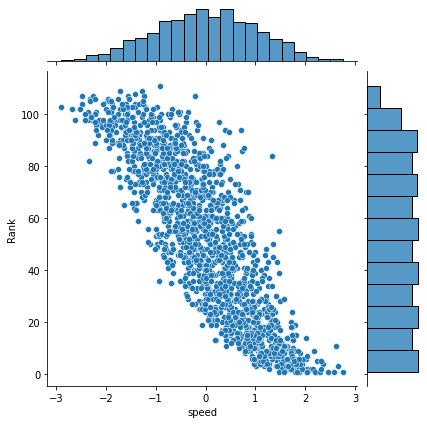

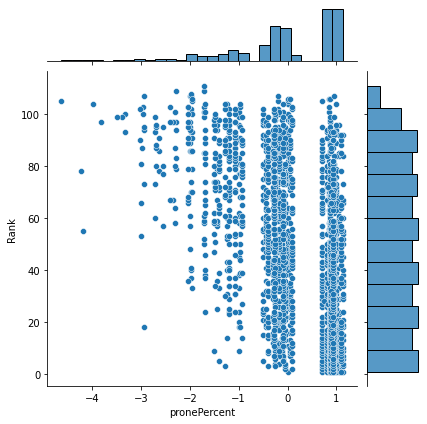

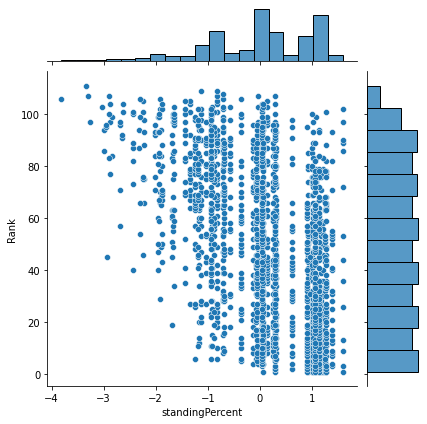

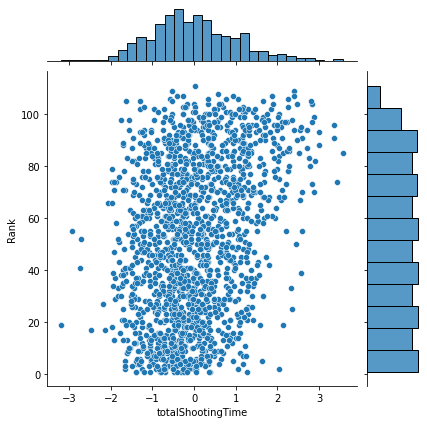

In [61]:
sns.jointplot(x='speed', y='Rank', data=InputForPred, kind='scatter')
sns.jointplot(x='pronePercent', y='Rank', data=InputForPred, kind='scatter')
sns.jointplot(x='standingPercent', y='Rank', data=InputForPred, kind='scatter')
sns.jointplot(x='totalShootingTime', y='Rank', data=InputForPred, kind='scatter')

There is a strong correlation between speed and the final place: on average, the higher speed, the higher the final place of the biathlete.
There is also a correlation between shooting accuracy and the final place, but it is not so strong.
Speaking about shooting time, the correlation is the weakest.

It is necessary to find out how the parameters of the performance correlate with each other. To this end, we will construct a heatmap.

<AxesSubplot:>

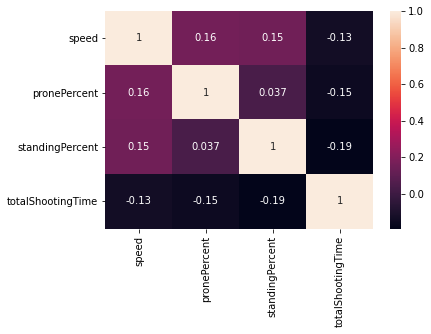

In [62]:
sns.heatmap(data=InputForPred[['speed', 'pronePercent', 'standingPercent', 'totalShootingTime']].corr(), annot = True)

The graph shows that parameters correlate slightly.

We should divide the final places of biathletes into the categories. There are two boundaries that may be of interest for potential investors who are planning to advertise on athletes' equipment: the first 8 places and the first 60 places. The biathletes who took places from the first to the eighth will participate in the awarding ceremony ("flower ceremony"), which will be broadcast on TV. The biathletes who took the first 60 places are very likely to be shown during the TV broadcast and will also participate in the next race (pursuit).

In [63]:
InputForPred['Rank'] = pd.cut(InputForPred['Rank'], [0, 8, 60, 113]).cat.codes

In [64]:
# prepare a dataset "TargetSprint" which contains the parameters of the performance and the final results in the target race 
# the data was normalixed and standardized and the categories were assigned
TargetSprint = pd.DataFrame(Sprint17)
TargetSprint = TargetSprint.loc[TargetSprint['totalShootingTime'] < TargetSprint['totalShootingTime'].quantile(0.99)]
TargetSprint = TargetSprint.loc[TargetSprint['speed'] > TargetSprint['speed'].quantile(0.01)]
TargetSprint[['speed', 'totalShootingTime']] = MinMaxScaler().fit_transform(
                                               TargetSprint[['speed', 'totalShootingTime']])
TargetSprint[['speed', 'pronePercent', 'standingPercent', 'totalShootingTime']] = StandardScaler().fit_transform(
                                    TargetSprint[[ 'speed', 'pronePercent', 'standingPercent', 'totalShootingTime']])

TargetSprint['Rank'] = pd.cut(TargetSprint['Rank'], [0, 8, 60, 113]).cat.codes

In [65]:
# "prepare" function takes the forecast made in the previous part of the study as input
# standardizes the data and return dataset combined with the actual results of the target race
def prepare(data):
    data[['speed', 'pronePercent', 'standingPercent', 'totalShootingTime']] = StandardScaler().fit_transform(
                                    data[[ 'speed', 'pronePercent', 'standingPercent', 'totalShootingTime']])
    data = pd.merge(TargetSprint, data, how='inner', on="ibuid", sort=False)
    data = data.rename(columns = {'speed_y': 'speed', 'pronePercent_y': 'pronePercent', 
                                  'standingPercent_y': 'standingPercent', 'totalShootingTime_y': 'totalShootingTime'})
    return data

In [66]:
# apply 'prepare' function to the forecasts obtained in the previous part of the study
ARTransfBCResPad = prepare(ARTransfBCResPad)
ARTransfBCResLin = prepare(ARTransfBCResLin)
ARTransfBCResNear = prepare(ARTransfBCResNear)
ARMATransfBCResPad = prepare(ARMATransfBCResPad)
ARMATransfBCResLin = prepare(ARMATransfBCResLin)
ARMATransfBCResNear = prepare(ARMATransfBCResNear)
ARIMATransfBCResPad = prepare(ARIMATransfBCResPad)
ARIMATransfBCResLin = prepare(ARIMATransfBCResLin)
ARIMATransfBCResNear = prepare(ARIMATransfBCResNear)
ExpSmTransfBCResPad = prepare(ExpSmTransfBCResPad)
ExpSmTransfBCResLin = prepare(ExpSmTransfBCResLin)
ExpSmTransfBCResNear = prepare(ExpSmTransfBCResNear)
TracesTransfBC = prepare(TracesTransfBC)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
# split "InputForPred" into train and test parts
X = InputForPred[InputForPred.columns[5:9]]
y = InputForPred['Rank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# define the columns containing the performance parameters as input
# define the column containing the results as target
TargetTest = TargetSprint[TargetSprint.columns[5:9]]
TargetPred = TargetSprint['Rank']

The purpose of this part of study is the process of predicting the class of given data points based on their characteristics. To solve the classification problem we will use decision trees and neural nets.

In [69]:
from sklearn.metrics import classification_report

In [70]:
from sklearn.model_selection import GridSearchCV

The first algorithm to be used is a decision tree.

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
# select the optimal parameters of the model using "GridSearchCV"
params = {'criterion': ['entropy', 'gini'], 
          'min_samples_leaf': range (1, 11),
          'min_samples_split': range (2, 11)}
grid = GridSearchCV(DecisionTreeClassifier(), params, 
                             scoring='f1_weighted')
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 3}

In [73]:
# train the model on training data, test it on a test data and obtain estimates
dtc = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, min_samples_split=3)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(classification_report(y_pred, y_test, 
    target_names = ['1-8', '9-60', '61+']))

              precision    recall  f1-score   support

         1-8       0.83      0.81      0.82        36
        9-60       0.91      0.88      0.89       279
         61+       0.88      0.92      0.90       220

    accuracy                           0.89       535
   macro avg       0.87      0.87      0.87       535
weighted avg       0.89      0.89      0.89       535



The "accuracy" metric is not informative since our classes have a different number of objects in them. The "precision" and "recall" metrics are more applicable in conditions of unbalanced samples. In our example the most informative metric is "f1-score", since it combines "precision" and "recall".

In [74]:
# test algorithm for target race
TargetDTCPred = dtc.predict(TargetTest)
print(classification_report(TargetDTCPred, 
TargetPred, target_names = ['1-8', '9-60', '61+']))

              precision    recall  f1-score   support

         1-8       1.00      0.67      0.80        12
        9-60       0.81      0.98      0.88        43
         61+       0.97      0.86      0.92        44

    accuracy                           0.89        99
   macro avg       0.93      0.84      0.87        99
weighted avg       0.91      0.89      0.89        99



Next algorithm is Extra Trees Classifier

In [75]:
from sklearn.ensemble import ExtraTreesClassifier

In [76]:
# select the optimal parameters of the model using "GridSearchCV"
params = {'criterion': ['entropy', 'gini'], 
          'min_samples_leaf': range (1, 11),
          'min_samples_split': range (2, 11)}
grid = GridSearchCV(ExtraTreesClassifier(), params, 
                            scoring='f1_weighted')
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 9}

In [77]:
# train the model on training data, test it on a test data and obtain estimates
etc = ExtraTreesClassifier(criterion='gini', min_samples_leaf=2, min_samples_split=9)
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
print(classification_report(y_pred, y_test, 
    target_names = ['1-8', '9-60', '61+']))

              precision    recall  f1-score   support

         1-8       0.83      0.91      0.87        32
        9-60       0.93      0.94      0.94       268
         61+       0.96      0.93      0.94       235

    accuracy                           0.93       535
   macro avg       0.90      0.93      0.91       535
weighted avg       0.94      0.93      0.93       535



In [78]:
# test algorithm for target race
TargetETCPred = etc.predict(TargetTest)
print(classification_report(TargetETCPred, 
TargetPred, target_names = ['1-8', '9-60', '61+']))

              precision    recall  f1-score   support

         1-8       1.00      0.89      0.94         9
        9-60       0.94      1.00      0.97        49
         61+       1.00      0.95      0.97        41

    accuracy                           0.97        99
   macro avg       0.98      0.95      0.96        99
weighted avg       0.97      0.97      0.97        99



Next algorithm is Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
# select the optimal parameters of the model using "GridSearchCV"
params = {'n_estimators': range (10, 51, 10),
          'max_depth': range (1, 11, 2),
          'min_samples_leaf': range (1, 5),
          'min_samples_split': range (2, 5, 1)}
grid = GridSearchCV(RandomForestClassifier(), params, scoring='f1_weighted')
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 20}

In [81]:
# train the model on training data, test it on a test data and obtain estimates
rf = RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_pred, y_test, target_names = ['1-8', '9-60', '61+']))

              precision    recall  f1-score   support

         1-8       0.83      0.81      0.82        36
        9-60       0.89      0.93      0.91       260
         61+       0.94      0.90      0.92       239

    accuracy                           0.91       535
   macro avg       0.89      0.88      0.88       535
weighted avg       0.91      0.91      0.91       535



In [82]:
# test algorithm for target race
TargetRFPred = rf.predict(TargetTest)
print(classification_report(TargetRFPred, TargetPred, target_names = ['1-8', '9-60', '61+']))

              precision    recall  f1-score   support

         1-8       1.00      1.00      1.00         8
        9-60       0.87      1.00      0.93        45
         61+       1.00      0.85      0.92        46

    accuracy                           0.93        99
   macro avg       0.96      0.95      0.95        99
weighted avg       0.94      0.93      0.93        99



Next algorithm is XGBoost

In [83]:
import xgboost

In [84]:
# select the optimal parameters of the model using "GridSearchCV"
params = {  'max_depth': [3, 5, 7],
            'min_child_weight': [1, 3, 5],
            'colsample_bytree': [0.6, 0.8, 1]
            }
grid = GridSearchCV(xgboost.XGBClassifier(eval_metric='mlogloss'), 
                    params, scoring='f1_weighted')
grid.fit(X_train, y_train)
grid.best_params_

{'colsample_bytree': 0.6, 'max_depth': 3, 'min_child_weight': 1}

In [85]:
# train the model on training data, test it on a test data and obtain estimates
xgb = xgboost.XGBClassifier(colsample_bytree=0.6, max_depth=3, min_child_weight=1, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_pred, y_test, target_names = ['1-8', '9-60', '61+']))

              precision    recall  f1-score   support

         1-8       0.89      0.82      0.85        38
        9-60       0.90      0.92      0.91       263
         61+       0.93      0.91      0.92       234

    accuracy                           0.91       535
   macro avg       0.90      0.88      0.89       535
weighted avg       0.91      0.91      0.91       535



In [86]:
# test algorithm for target race
TargetXGBPred = xgb.predict(TargetTest)
print(classification_report(TargetXGBPred, TargetPred, target_names = ['1-8', '9-60', '61+']))

              precision    recall  f1-score   support

         1-8       1.00      0.80      0.89        10
        9-60       0.87      1.00      0.93        45
         61+       1.00      0.89      0.94        44

    accuracy                           0.93        99
   macro avg       0.96      0.90      0.92        99
weighted avg       0.94      0.93      0.93        99



Next algorithm is Multilayered perceptron

In [87]:
from sklearn.neural_network import MLPClassifier

In [88]:
# select the optimal parameters of the model using "GridSearchCV"
params = {'max_iter': [25, 50, 100],
          'alpha': [0.001, 0.5],
          'learning_rate': ['constant', 'adaptive']}
grid = GridSearchCV(MLPClassifier(), params, scoring='f1_weighted')
grid.fit(X_train, y_train)
grid.best_params_

{'alpha': 0.5, 'learning_rate': 'adaptive', 'max_iter': 100}

In [89]:
# train the model on training data, test it on a test data and obtain estimates
clf = MLPClassifier(max_iter=100, alpha=0.5, learning_rate='adaptive').fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_pred, y_test, target_names = ['1-8', '9-60', '61+']))

              precision    recall  f1-score   support

         1-8       0.89      0.94      0.91        33
        9-60       0.95      0.97      0.96       267
         61+       0.98      0.95      0.97       235

    accuracy                           0.96       535
   macro avg       0.94      0.95      0.95       535
weighted avg       0.96      0.96      0.96       535



In [90]:
# test algorithm for target race
TargetCLFPred = clf.predict(TargetTest)
print(classification_report(TargetCLFPred, TargetPred, target_names = ['1-8', '9-60', '61+']))

              precision    recall  f1-score   support

         1-8       1.00      1.00      1.00         8
        9-60       0.94      1.00      0.97        49
         61+       1.00      0.93      0.96        42

    accuracy                           0.97        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.97      0.97      0.97        99



Next algorithm is Neural net with 3 hidden layers

In [91]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.wrappers.scikit_learn import KerasClassifier

In [92]:
# select the optimal parameters of the model using "GridSearchCV"
def create_model():
    model = Sequential()
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(12, activation = 'relu'))
    model.add(Dense(4, activation = 'softmax'))
    model.compile(optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['sparse_categorical_accuracy'])
    return model

NN = KerasClassifier(build_fn=create_model, verbose=0)
params = {'batch_size':[1, 2, 4], 'epochs':[5, 10, 25]}
grid = GridSearchCV(NN, params, scoring='f1_weighted')
grid.fit(X_train, y_train)
grid.best_params_

{'batch_size': 1, 'epochs': 10}

In [93]:
# train the model on training data, test it on a test data and obtain estimates
NN = Sequential()
NN.add(Dense(128, activation = 'relu'))
NN.add(Dense(12, activation = 'relu'))
NN.add(Dense(4, activation = 'softmax'))
NN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
NN.fit(X_train, y_train, epochs = 10, batch_size=1)
y_pred = np.argmax(NN.predict(X_test), axis=1)
print(classification_report(y_pred, y_test, target_names = ['1-8', '9-60', '61+']))

Epoch 1/10
1084/1084 [==============================] - 2s 1ms/step - loss: 0.6710 - sparse_categorical_accuracy: 0.7979
Epoch 2/10
1084/1084 [==============================] - 1s 1ms/step - loss: 0.1787 - sparse_categorical_accuracy: 0.9325
Epoch 3/10
1084/1084 [==============================] - 1s 1ms/step - loss: 0.1659 - sparse_categorical_accuracy: 0.9212
Epoch 4/10
1084/1084 [==============================] - 1s 1ms/step - loss: 0.1619 - sparse_categorical_accuracy: 0.9275
Epoch 5/10
1084/1084 [==============================] - 1s 1ms/step - loss: 0.1310 - sparse_categorical_accuracy: 0.9420
Epoch 6/10
1084/1084 [==============================] - 1s 1ms/step - loss: 0.1274 - sparse_categorical_accuracy: 0.9528
Epoch 7/10
1084/1084 [==============================] - 1s 1ms/step - loss: 0.1294 - sparse_categorical_accuracy: 0.9515
Epoch 8/10
1084/1084 [==============================] - 1s 1ms/step - loss: 0.1144 - sparse_categorical_accuracy: 0.9572
Epoch 9/10
1084/1084 [==========

In [94]:
# test algorithm for target race
TargetNNPred = np.argmax(NN.predict(TargetTest), axis=1)
print(classification_report(TargetNNPred, TargetPred, target_names = ['1-8', '9-60', '61+']))

              precision    recall  f1-score   support

         1-8       1.00      1.00      1.00         8
        9-60       0.94      1.00      0.97        49
         61+       1.00      0.93      0.96        42

    accuracy                           0.97        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.97      0.97      0.97        99



In [95]:
# the "modeltest" function returns the "classification_report" metric for the model 
# and the dataset that was given as input
def modeltest(data, model):
    if model == NN:
        y_pred = np.argmax(model.predict(data[data.columns[10:14]]), axis=1)
        print(classification_report(y_pred, data['Rank'], target_names = ['1-8', '9-60', '61+']))
    else:
        y_pred = model.predict(data[data.columns[10:14]])
        print(classification_report(y_pred, data['Rank'], target_names = ['1-8', '9-60', '61+']))

In [96]:
modeltest(ARTransfBCResPad, dtc)
modeltest(ARTransfBCResLin, dtc)
modeltest(ARTransfBCResNear, dtc)
modeltest(ARMATransfBCResPad, dtc)
modeltest(ARMATransfBCResLin, dtc)
modeltest(ARMATransfBCResNear, dtc)
modeltest(ARIMATransfBCResPad, dtc)
modeltest(ARIMATransfBCResLin, dtc)
modeltest(ARIMATransfBCResNear, dtc)
modeltest(ExpSmTransfBCResPad, dtc)
modeltest(ExpSmTransfBCResLin, dtc)
modeltest(ExpSmTransfBCResNear, dtc)
modeltest(TracesTransfBC, dtc)

              precision    recall  f1-score   support

         1-8       0.62      0.71      0.67         7
        9-60       0.77      0.67      0.72        49
         61+       0.61      0.71      0.66        28

    accuracy                           0.69        84
   macro avg       0.67      0.70      0.68        84
weighted avg       0.70      0.69      0.69        84

              precision    recall  f1-score   support

         1-8       0.88      0.78      0.82         9
        9-60       0.83      0.78      0.80        45
         61+       0.73      0.83      0.77        29

    accuracy                           0.80        83
   macro avg       0.81      0.79      0.80        83
weighted avg       0.80      0.80      0.80        83

              precision    recall  f1-score   support

         1-8       0.50      0.57      0.53         7
        9-60       0.63      0.66      0.64        41
         61+       0.67      0.61      0.63        33

    accuracy        

In [97]:
modeltest(ARTransfBCResPad, etc)
modeltest(ARTransfBCResLin, etc)
modeltest(ARTransfBCResNear, etc)
modeltest(ARMATransfBCResPad, etc)
modeltest(ARMATransfBCResLin, etc)
modeltest(ARMATransfBCResNear, etc)
modeltest(ARIMATransfBCResPad, etc)
modeltest(ARIMATransfBCResLin, etc)
modeltest(ARIMATransfBCResNear, etc)
modeltest(ExpSmTransfBCResPad, etc)
modeltest(ExpSmTransfBCResLin, etc)
modeltest(ExpSmTransfBCResNear, etc)
modeltest(TracesTransfBC, etc)

              precision    recall  f1-score   support

         1-8       0.50      0.67      0.57         6
        9-60       0.81      0.69      0.74        51
         61+       0.64      0.78      0.70        27

    accuracy                           0.71        84
   macro avg       0.65      0.71      0.67        84
weighted avg       0.73      0.71      0.72        84

              precision    recall  f1-score   support

         1-8       0.75      0.75      0.75         8
        9-60       0.83      0.73      0.78        48
         61+       0.67      0.81      0.73        27

    accuracy                           0.76        83
   macro avg       0.75      0.76      0.75        83
weighted avg       0.77      0.76      0.76        83

              precision    recall  f1-score   support

         1-8       0.62      0.62      0.62         8
        9-60       0.67      0.67      0.67        43
         61+       0.63      0.63      0.63        30

    accuracy        

In [98]:
modeltest(ARTransfBCResPad, rf)
modeltest(ARTransfBCResLin, rf)
modeltest(ARTransfBCResNear, rf)
modeltest(ARMATransfBCResPad, rf)
modeltest(ARMATransfBCResLin, rf)
modeltest(ARMATransfBCResNear, rf)
modeltest(ARIMATransfBCResPad, rf)
modeltest(ARIMATransfBCResLin, rf)
modeltest(ARIMATransfBCResNear, rf)
modeltest(ExpSmTransfBCResPad, rf)
modeltest(ExpSmTransfBCResLin, rf)
modeltest(ExpSmTransfBCResNear, rf)
modeltest(TracesTransfBC, rf)

              precision    recall  f1-score   support

         1-8       0.38      0.50      0.43         6
        9-60       0.77      0.66      0.71        50
         61+       0.64      0.75      0.69        28

    accuracy                           0.68        84
   macro avg       0.59      0.64      0.61        84
weighted avg       0.70      0.68      0.68        84

              precision    recall  f1-score   support

         1-8       0.75      0.67      0.71         9
        9-60       0.79      0.73      0.76        45
         61+       0.70      0.79      0.74        29

    accuracy                           0.75        83
   macro avg       0.74      0.73      0.74        83
weighted avg       0.75      0.75      0.75        83

              precision    recall  f1-score   support

         1-8       0.38      0.43      0.40         7
        9-60       0.60      0.60      0.60        43
         61+       0.60      0.58      0.59        31

    accuracy        

In [99]:
modeltest(ARTransfBCResPad, xgb)
modeltest(ARTransfBCResLin, xgb)
modeltest(ARTransfBCResNear, xgb)
modeltest(ARMATransfBCResPad, xgb)
modeltest(ARMATransfBCResLin, xgb)
modeltest(ARMATransfBCResNear, xgb)
modeltest(ARIMATransfBCResPad, xgb)
modeltest(ARIMATransfBCResLin, xgb)
modeltest(ARIMATransfBCResNear, xgb)
modeltest(ExpSmTransfBCResPad, xgb)
modeltest(ExpSmTransfBCResLin, xgb)
modeltest(ExpSmTransfBCResNear, xgb)
modeltest(TracesTransfBC, xgb)

              precision    recall  f1-score   support

         1-8       0.38      0.60      0.46         5
        9-60       0.79      0.67      0.72        51
         61+       0.64      0.75      0.69        28

    accuracy                           0.69        84
   macro avg       0.60      0.67      0.62        84
weighted avg       0.71      0.69      0.70        84

              precision    recall  f1-score   support

         1-8       0.75      0.67      0.71         9
        9-60       0.81      0.76      0.78        45
         61+       0.73      0.83      0.77        29

    accuracy                           0.77        83
   macro avg       0.76      0.75      0.75        83
weighted avg       0.77      0.77      0.77        83

              precision    recall  f1-score   support

         1-8       0.50      0.57      0.53         7
        9-60       0.70      0.68      0.69        44
         61+       0.67      0.67      0.67        30

    accuracy        

In [100]:
modeltest(ARTransfBCResPad, clf)
modeltest(ARTransfBCResLin, clf)
modeltest(ARTransfBCResNear, clf)
modeltest(ARMATransfBCResPad, clf)
modeltest(ARMATransfBCResLin, clf)
modeltest(ARMATransfBCResNear, clf)
modeltest(ARIMATransfBCResPad, clf)
modeltest(ARIMATransfBCResLin, clf)
modeltest(ARIMATransfBCResNear, clf)
modeltest(ExpSmTransfBCResPad, clf)
modeltest(ExpSmTransfBCResLin, clf)
modeltest(ExpSmTransfBCResNear, clf)
modeltest(TracesTransfBC, clf)

              precision    recall  f1-score   support

         1-8       0.50      0.67      0.57         6
        9-60       0.74      0.68      0.71        47
         61+       0.67      0.71      0.69        31

    accuracy                           0.69        84
   macro avg       0.64      0.69      0.66        84
weighted avg       0.70      0.69      0.69        84

              precision    recall  f1-score   support

         1-8       0.75      0.67      0.71         9
        9-60       0.76      0.71      0.74        45
         61+       0.67      0.76      0.71        29

    accuracy                           0.72        83
   macro avg       0.73      0.71      0.72        83
weighted avg       0.73      0.72      0.72        83

              precision    recall  f1-score   support

         1-8       0.75      0.67      0.71         9
        9-60       0.65      0.70      0.67        40
         61+       0.67      0.62      0.65        32

    accuracy        

In [101]:
modeltest(ARTransfBCResPad, NN)
modeltest(ARTransfBCResLin, NN)
modeltest(ARTransfBCResNear, NN)
modeltest(ARMATransfBCResPad, NN)
modeltest(ARMATransfBCResLin, NN)
modeltest(ARMATransfBCResNear, NN)
modeltest(ARIMATransfBCResPad, NN)
modeltest(ARIMATransfBCResLin, NN)
modeltest(ARIMATransfBCResNear, NN)
modeltest(ExpSmTransfBCResPad, NN)
modeltest(ExpSmTransfBCResLin, NN)
modeltest(ExpSmTransfBCResNear, NN)
modeltest(TracesTransfBC, NN)

              precision    recall  f1-score   support

         1-8       0.62      0.71      0.67         7
        9-60       0.74      0.70      0.72        46
         61+       0.67      0.71      0.69        31

    accuracy                           0.70        84
   macro avg       0.68      0.71      0.69        84
weighted avg       0.71      0.70      0.70        84

              precision    recall  f1-score   support

         1-8       0.75      0.67      0.71         9
        9-60       0.76      0.73      0.74        44
         61+       0.70      0.77      0.73        30

    accuracy                           0.73        83
   macro avg       0.74      0.72      0.73        83
weighted avg       0.74      0.73      0.73        83

              precision    recall  f1-score   support

         1-8       0.75      0.67      0.71         9
        9-60       0.67      0.72      0.70        40
         61+       0.70      0.66      0.68        32

    accuracy        

In [102]:
# best results
modeltest(ARTransfBCResLin, dtc)
modeltest(ARTransfBCResLin, etc)
modeltest(ARMATransfBCResLin, etc)
modeltest(ARTransfBCResLin, rf)
modeltest(ARMATransfBCResLin, rf)
modeltest(ARTransfBCResLin, xgb)
modeltest(ARMATransfBCResLin, xgb)
modeltest(ARMATransfBCResLin, clf)
modeltest(ARMATransfBCResLin, NN)

              precision    recall  f1-score   support

         1-8       0.88      0.78      0.82         9
        9-60       0.83      0.78      0.80        45
         61+       0.73      0.83      0.77        29

    accuracy                           0.80        83
   macro avg       0.81      0.79      0.80        83
weighted avg       0.80      0.80      0.80        83

              precision    recall  f1-score   support

         1-8       0.75      0.75      0.75         8
        9-60       0.83      0.73      0.78        48
         61+       0.67      0.81      0.73        27

    accuracy                           0.76        83
   macro avg       0.75      0.76      0.75        83
weighted avg       0.77      0.76      0.76        83

              precision    recall  f1-score   support

         1-8       0.75      0.67      0.71         9
        9-60       0.74      0.73      0.74        48
         61+       0.65      0.69      0.67        29

    accuracy        

It can be concluded that the good strategy is to interpolate with 'Linear' method. 
The best results in predicting parameters were shown by AR and ARMA models.
The best results in predicting final places were shown by Decision Tree and Neural net with 3 hidden layers.

<AxesSubplot:>

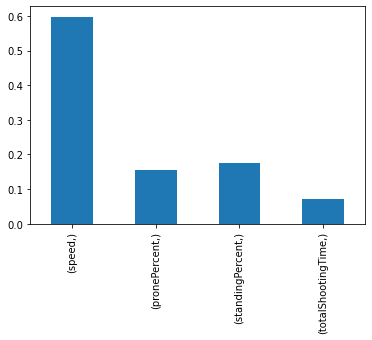

In [103]:
# research on the contribution of each parameter to the results of the biathlete
rf_importances = pd.Series(rf.feature_importances_, index=[X.columns.values])
rf_importances.plot.bar()

The speed value provides up to 60% to final result. 
However if the categories were more detailed (every 10 places) the contribution of speed becomes less and shooting accuracy begins to play a more important role

<AxesSubplot:>

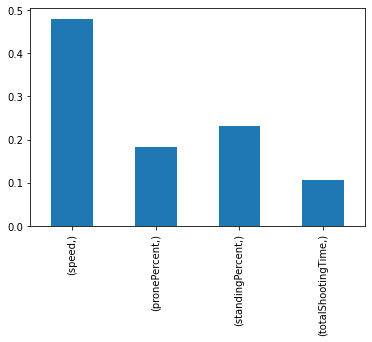

In [104]:
InputForPred = pd.DataFrame()
for table in AllSprintList[:16]:
    table = table.loc[table['totalShootingTime'] < table['totalShootingTime'].quantile(0.99)]
    table = table.loc[table['speed'] > table['speed'].quantile(0.01)]
    table[['speed', 'totalShootingTime']] = MinMaxScaler().fit_transform(table[
        ['speed', 'totalShootingTime']])
    table[['speed', 'pronePercent', 'standingPercent', 'totalShootingTime']] = StandardScaler().fit_transform(table[
        ['speed', 'pronePercent', 'standingPercent', 'totalShootingTime']])
    InputForPred = InputForPred.append(table)
InputForPred['Rank'] = pd.cut(InputForPred['Rank'], [0, 3, 10, 20, 30, 50, 70, 90, 113]).cat.codes
X = InputForPred[InputForPred.columns[5:9]]
y = InputForPred['Rank']
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.33, random_state=42)

rf = RandomForestClassifier(max_depth=9, 
min_samples_leaf=3, min_samples_split=2, n_estimators=20)
rf.fit(X_train, y_train)

rf_importances = pd.Series(rf.feature_importances_
                        , index=[X.columns.values])
rf_importances.plot.bar()